In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
events_data = pd.read_csv('datasets/df_concat7.csv')
events_data.head()


,Month,Area Affected,NERC Region,Event Type,Demand Loss (MW),Number of Customers Affected,Year,Date/Time Event Began,Date/Time Restoration,Event Duration (hours)
0,January,Washington,WECC,System Operations,0.0,NaN,2019,2019-01-05 13:19:00,2019-01-05 15:07:00,1.80
1,January,Washington,WECC,Severe Weather,230.0,230000.0,2019,2019-01-06 03:00:00,2019-01-09 07:00:00,4.00
2,January,California,WECC,Severe Weather,300.0,90382.0,2019,2019-01-06 17:56:00,2019-01-06 21:52:00,3.93
3,January,Washington,WECC,Severe Weather,NaN,230000.0,2019,2019-01-06 01:00:00,2019-01-06 12:00:00,11.00
4,January,Michigan,RF,System Operations,0.0,0.0,2019,2019-01-07 20:57:00,2019-01-07 21:32:00,0.58


### How many electric disturbances occurred in the U.S. from 2019 to 2022?

In [24]:
print(f'{events_data.shape[0]} events were recorded.')

1438 events were recorded.


### What was the number of events per year?

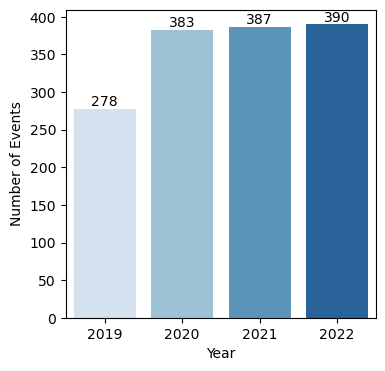

In [16]:
# list with number of events per year
number_events_year = []

# range of years
years = range(2019, 2023, 1)

# filtering the number of events by year
for i in years:
    result = events_data.query('Year == @i')
    number_events_year.append(result.shape[0])

# dataframe with number of events and year variables
df = pd.DataFrame({'Number of Events':number_events_year,'Year':years})

# plotting 
fig = plt.subplots(figsize=(4,4))
ax = sns.barplot(data = df, x='Year', y='Number of Events', palette='Blues')
ax.bar_label(ax.containers[0])# this line shows the values
plt.show()

### What was the number of electric disturbances by month each year?

In [3]:
#each_year = events_data.groupby(['Year']).count()
events_each_month = events_data.groupby(['Year','Month'], sort=False, as_index=False)['Area Affected'].count()
events_each_month.rename(columns={'Area Affected':'Number of Events'}, inplace=True)

events_each_month.head()

,Year,Month,Number of Events
0,2019,January,26
1,2019,February,25
2,2019,March,11
3,2019,April,27
4,2019,May,15


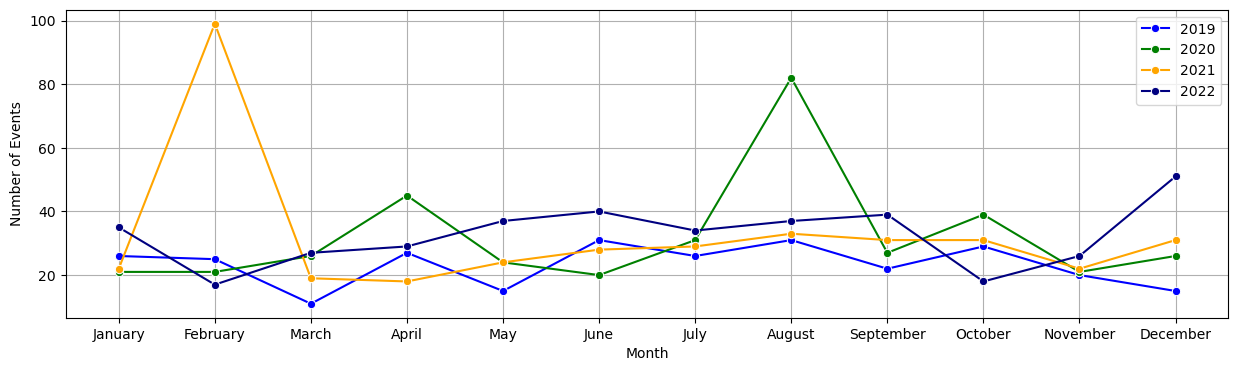

In [66]:
df_2019 = events_each_month.loc[events_each_month.loc[:,'Year'] == 2019,['Number of Events','Month']]
df_2020 = events_each_month.loc[events_each_month.loc[:,'Year'] == 2020,['Number of Events','Month']]
df_2021 = events_each_month.loc[events_each_month.loc[:,'Year'] == 2021,['Number of Events','Month']]
df_2022 = events_each_month.loc[events_each_month.loc[:,'Year'] == 2022,['Number of Events','Month']]

fig = plt.subplots(figsize=(15,4))
sns.lineplot(data=df_2019, x='Month', y= 'Number of Events', marker='o', color='blue', label='2019')
sns.lineplot(data=df_2020, x='Month', y= 'Number of Events', marker='o', color='green', label='2020')
sns.lineplot(data=df_2021, x='Month', y= 'Number of Events', marker='o', color='orange', label='2021')
sns.lineplot(data=df_2022, x='Month', y= 'Number of Events', marker='o', color='navy', label='2022')

plt.grid(True)
plt.show()


In [4]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
events_each_month_pivoted = events_each_month.pivot(index='Month',columns=['Year'],values='Number of Events')
events_each_month_pivoted = events_each_month_pivoted.reindex(index=months)
events_each_month_pivoted.head()

Year,2019,2020,2021,2022
Month,,,,
January,26,21,22,35
February,25,21,99,17
March,11,26,19,27
April,27,45,18,29
May,15,24,24,37


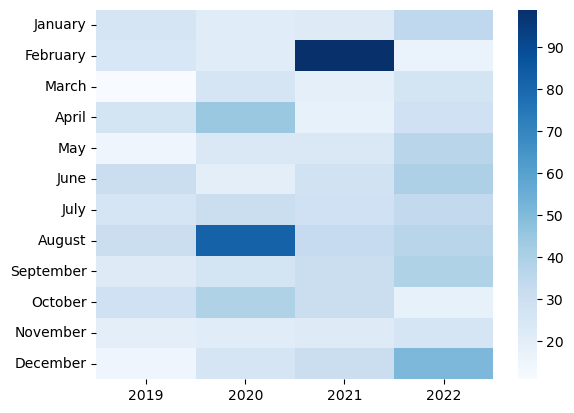

In [5]:
ax2 = sns.heatmap(events_each_month_pivoted, cmap='Blues')
ax2.set(xlabel="", ylabel="")
plt.show()

In [ ]:
# https://en.wikipedia.org/wiki/2021_Texas_power_crisis
# https://www.politico.com/states/california/story/2020/08/18/california-has-first-rolling-blackouts-in-19-years-and-everyone-faces-blame-1309757

### What is the percentage of disturbances by season?

In [22]:
#Spring - March to May.
#Summer - June to August.
#Autumn - September to November.
#Winter - December to February.

spring = events_data.loc[(events_data.loc[:,'Month']=='March') | (events_data.loc[:,'Month']=='April') | (events_data.loc[:,'Month']=='May')].shape[0]
summer = events_data.loc[(events_data.loc[:,'Month']=='June') | (events_data.loc[:,'Month']=='July') | (events_data.loc[:,'Month']=='August')].shape[0]
autumn = events_data.loc[(events_data.loc[:,'Month']=='September') | (events_data.loc[:,'Month']=='October') | (events_data.loc[:,'Month']=='November')].shape[0]
winter = events_data.loc[(events_data.loc[:,'Month']=='December') | (events_data.loc[:,'Month']=='January') | (events_data.loc[:,'Month']=='February')].shape[0]
events = [spring,summer,autumn,winter]

percentage = [(spring/sum(events))*100, (summer/sum(events))*100,
              (autumn/sum(events))*100, (winter/sum(events))*100]

events_season = pd.DataFrame({'Season':['Spring','Summer','Autumn','Winter'],'Number of Events':events,'Percentage':percentage})
events_season['Percentage'] = round(events_season['Percentage'],2)
events_season=events_season.sort_values('Percentage', ascending=False)
events_season


,Season,Number of Events,Percentage
1,Summer,422,29.35
3,Winter,389,27.05
2,Autumn,325,22.60
0,Spring,302,21.00


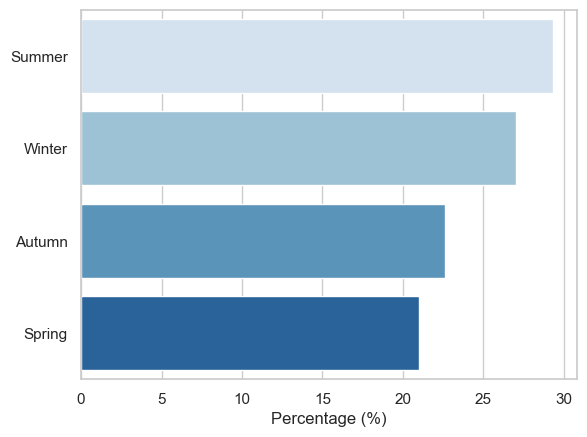

In [24]:
sns.set_theme(style='whitegrid')
ax3 = sns.barplot(data=events_season, x = 'Percentage', y= 'Season', palette='Blues')
ax3.set(xlabel="Percentage (%)", ylabel="")
plt.show()

In [ ]:
# Obs: Percentual of electric distubances 

In [ ]:
# https://realpython.com/pandas-groupby/
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
# https://www.datacamp.com/tutorial/python-seaborn-line-plot-tutorial


In [48]:
spring

302

### Which states registered more disturbances events?

In [3]:
# list with all the US states
us_states_list = ['Alabama','Alaska', 'Arizona', 'Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']

In [4]:
# function to search a specific state in a string 
# returns true or false
def state_search(s, search):
    return search in str(s)

In [36]:
# caculating the number of events in each state
list_events_state = []
for state_name in us_states_list:
    st_events_number = events_data.loc[:,'Area Affected'].apply(lambda x: state_search(x, state_name)).sum()
    list_events_state.append(st_events_number)

# dataframe with the number of disturbances by state
df_state_events = pd.DataFrame({'State':us_states_list, 'Number of events':list_events_state})

# top 5 states with more disturbances
df_state_events.sort_values('Number of events',ascending=False).head()

,State,Number of events
42,Texas,214
4,California,198
46,Washington,82
17,Louisiana,58
21,Michigan,58


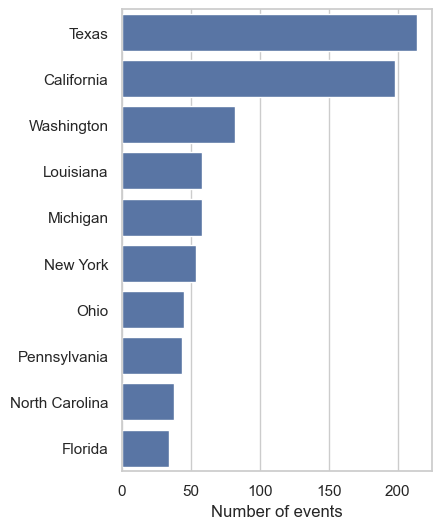

In [43]:
df_sorted = df_state_events.sort_values('Number of events',ascending=False).head(10)

# setting the grid style
sns.set_theme(style='whitegrid')

# setting the matplotlib fig
fig, ax = plt.subplots(figsize=(4,6))

# ploting the events of the 10 firt states
sns.barplot(data = df_sorted, x='Number of events', y='State', color='b')

ax.set(ylabel="")
plt.show()

### Which hour of the day occurs more electric disturbances?

In [5]:
events_data['Date/Time Event Began'] = pd.to_datetime(events_data['Date/Time Event Began'], errors='coerce')
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Month                         1438 non-null   object        
 1   Area Affected                 1438 non-null   object        
 2   NERC Region                   1438 non-null   object        
 3   Event Type                    1438 non-null   object        
 4   Demand Loss (MW)              1028 non-null   float64       
 5   Number of Customers Affected  1250 non-null   float64       
 6   Year                          1438 non-null   int64         
 7   Date/Time Event Began         1438 non-null   datetime64[ns]
 8   Date/Time Restoration         1242 non-null   object        
 9   Event Duration (hours)        1242 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 112.5+ KB


In [17]:
events_data.loc[:,'Date/Time Event Began'].hour


AttributeError: 'Series' object has no attribute 'hour'

In [ ]:
# create a dataframe - 2 columns - 'hour of the day' and 'events number'
# create a function to apply the hour method to each line

#1. turn date/time event began in datetime
#2. access the 'date/time event began' column
#3. do a for loop from 1 to 24 
#4. filter for each hour and count the number of events
#5. append the total number to the 'events number' list 
#6. plot a heatmap with the num of events by hour

# https://python-graph-gallery.com/heatmap-for-timeseries-matplotlib/

### What is the most commom event type? And by month?

### Which event types caused more Demand loss?

### What is the number of customers affected by each year?

### What is the average time of restoration by each event type?